In [ ]:
# Örnek bir veri seti yükleyelim
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Aykırı değerleri kaldırma
from pycaret.regression import *
setup = setup(data, target='charges', remove_outliers='True')

,Description,Value
0,Session id,8085
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1291, 10)"
5,Transformed train set shape,"(889, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [ ]:
# Özellikleri ölçeklendirme
from pycaret.regression import *
setup = setup(data, target='charges', normalize=True, normalize_method='minmax')

,Description,Value
0,Session id,8145
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [ ]:
setup.dataset_transformed.head()

,age,sex,bmi,children,smoker,region_northwest,region_southwest,region_southeast,region_northeast,charges
318,0.565217,0.0,0.298224,0.0,0.0,1.0,0.0,0.0,0.0,7421.194336
550,0.978261,1.0,0.385103,0.0,0.0,0.0,1.0,0.0,0.0,13390.558594
1173,0.434783,1.0,0.342696,0.4,0.0,1.0,0.0,0.0,0.0,6457.843262
1015,0.891304,1.0,0.238056,0.0,0.0,1.0,0.0,0.0,0.0,12124.992188
212,0.130435,1.0,0.321768,0.4,0.0,1.0,0.0,0.0,0.0,3537.702881


In [ ]:
from pycaret.regression import *
setup = setup(data, target='charges', train_size=0.8)
compare = compare_models(sort='R2')

,Description,Value
0,Session id,6754
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(1070, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2627.8769,22465374.2197,4670.5774,0.8536,0.4339,0.3040,0.8000
lightgbm,Light Gradient Boosting Machine,2950.1085,24626949.1108,4902.8546,0.8389,0.5314,0.3661,0.4340
rf,Random Forest Regressor,2804.8331,24975465.9035,4939.9764,0.8364,0.4590,0.3269,0.8520
ada,AdaBoost Regressor,3976.9274,27150607.7955,5169.7149,0.8198,0.5967,0.6559,0.3290
et,Extra Trees Regressor,2848.6492,28779471.6278,5314.9753,0.8099,0.4742,0.3126,0.8860
xgboost,Extreme Gradient Boosting,3201.7142,29483607.8000,5386.3071,0.8048,0.5449,0.4036,0.4400
br,Bayesian Ridge,4336.1684,39433584.6739,6244.0834,0.7360,0.5863,0.4306,0.2350
ridge,Ridge Regression,4341.0750,39433822.0061,6243.9230,0.7360,0.5843,0.4315,0.2510
lar,Least Angle Regression,4330.1460,39433901.8695,6244.3294,0.7359,0.5898,0.4296,0.4470
llar,Lasso Least Angle Regression,4330.3834,39433952.8459,6244.3360,0.7359,0.5886,0.4296,0.4820


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
gbr = create_model('gbr', return_train_score = True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Randomized-Search ile parametre optimizasyonu
tune_model(gbr, search_library='scikit-learn', search_algorithm='random')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3046.9016,22250066.7593,4716.9976,0.7984,0.5477,0.3711
1,3273.3272,29944093.6716,5472.1197,0.7785,0.6285,0.4304
2,3276.7429,31721911.3779,5632.2208,0.8156,0.5485,0.3834
3,3445.3902,35272485.9631,5939.0644,0.8124,0.6304,0.3710
4,4242.0579,46530372.4303,6821.3175,0.7411,0.6320,0.4439
5,3705.0081,39631284.0630,6295.3383,0.7908,1.0145,0.4147
6,3871.1108,35096870.3509,5924.2612,0.7943,0.5303,0.4494
7,3216.7007,26214606.0406,5120.0201,0.7858,0.5599,0.4678
8,3182.9072,24966183.0258,4996.6172,0.8203,0.5905,0.3926


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


GradientBoostingRegressor(random_state=6754)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

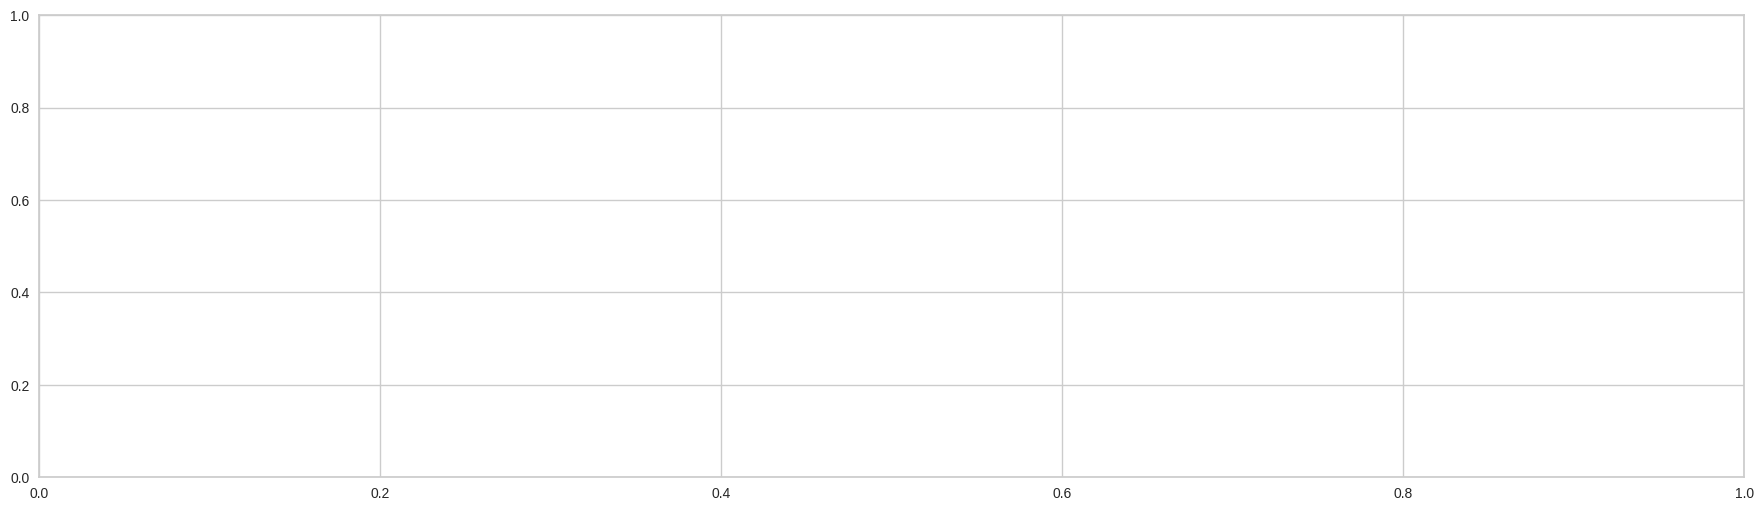

In [ ]:
# Model üzerinde görsel incelemeler yapma
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2428.7307,16942682.8890,4116.1490,0.8465,0.3591,0.2709
1,2864.2145,25332396.0165,5033.1298,0.8126,0.5053,0.3721
2,2831.9925,27258429.3474,5220.9606,0.8416,0.5231,0.3144
3,2827.9521,33369354.6707,5776.6214,0.8225,0.4724,0.2767
4,3327.8280,35102447.4720,5924.7318,0.8047,0.4881,0.3125
5,3118.6236,31375456.8359,5601.3799,0.8344,0.5135,0.3350
6,3068.2852,27064510.9172,5202.3563,0.8414,0.4017,0.3009
7,2739.4569,21941327.7868,4684.1571,0.8207,0.4339,0.3767
8,2814.9671,20095083.2877,4482.7540,0.8554,0.4627,0.3422


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

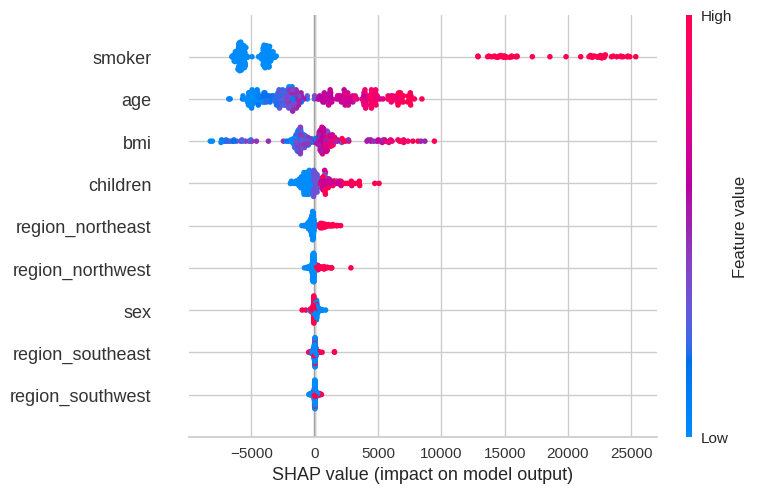

In [ ]:
# Modelin davranış tarzını anlama
rf = create_model('rf')
interpret_model(rf)

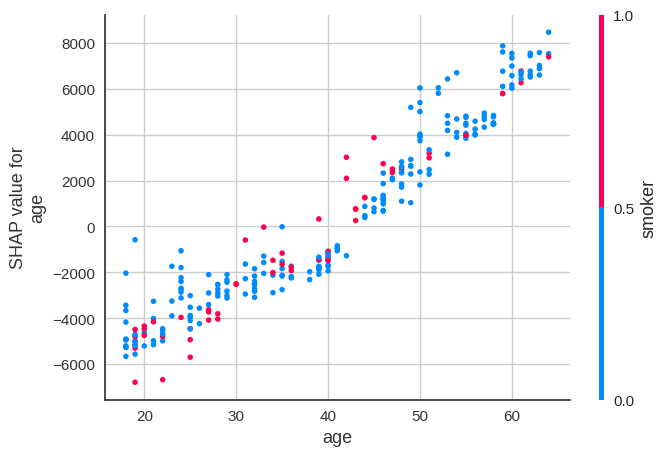

In [ ]:
# Yaş sütununa ait scatter plot
interpret_model(rf, plot='correlation',
                feature='age')